🔄 GitOps Workflow Automation with ArgoCD

📝 Generating Git commit history...
  ✓ Generated 177 commits

🚀 Simulating deployments...
  ✓ Simulated 431 deployments
    • dev: 177 deployments, 89.3% success
    • staging: 158 deployments, 93.7% success
    • production: 96 deployments, 91.7% success

🔄 Simulating automated rollbacks...
  ✓ Executed 34 rollbacks
    • Success rate: 33/34

📊 Calculating DORA metrics...
  ✓ Deployment Frequency: 13.47/day
  ✓ Mean Lead Time: 50.77 hours
  ✓ Change Failure Rate: 7.89%
  ✓ MTTR: 26.36 minutes

🔄 GITOPS WORKFLOW AUTOMATION REPORT

📝 GIT ACTIVITY
--------------------------------------------------------------------------------
Total Commits:                  177
Contributors:                   4
Applications:                   3

🚀 DEPLOYMENT METRICS (DORA)
--------------------------------------------------------------------------------
Deployment Frequency:           13.47/day
Total Deployments:              431
Mean Lead Time:                 5

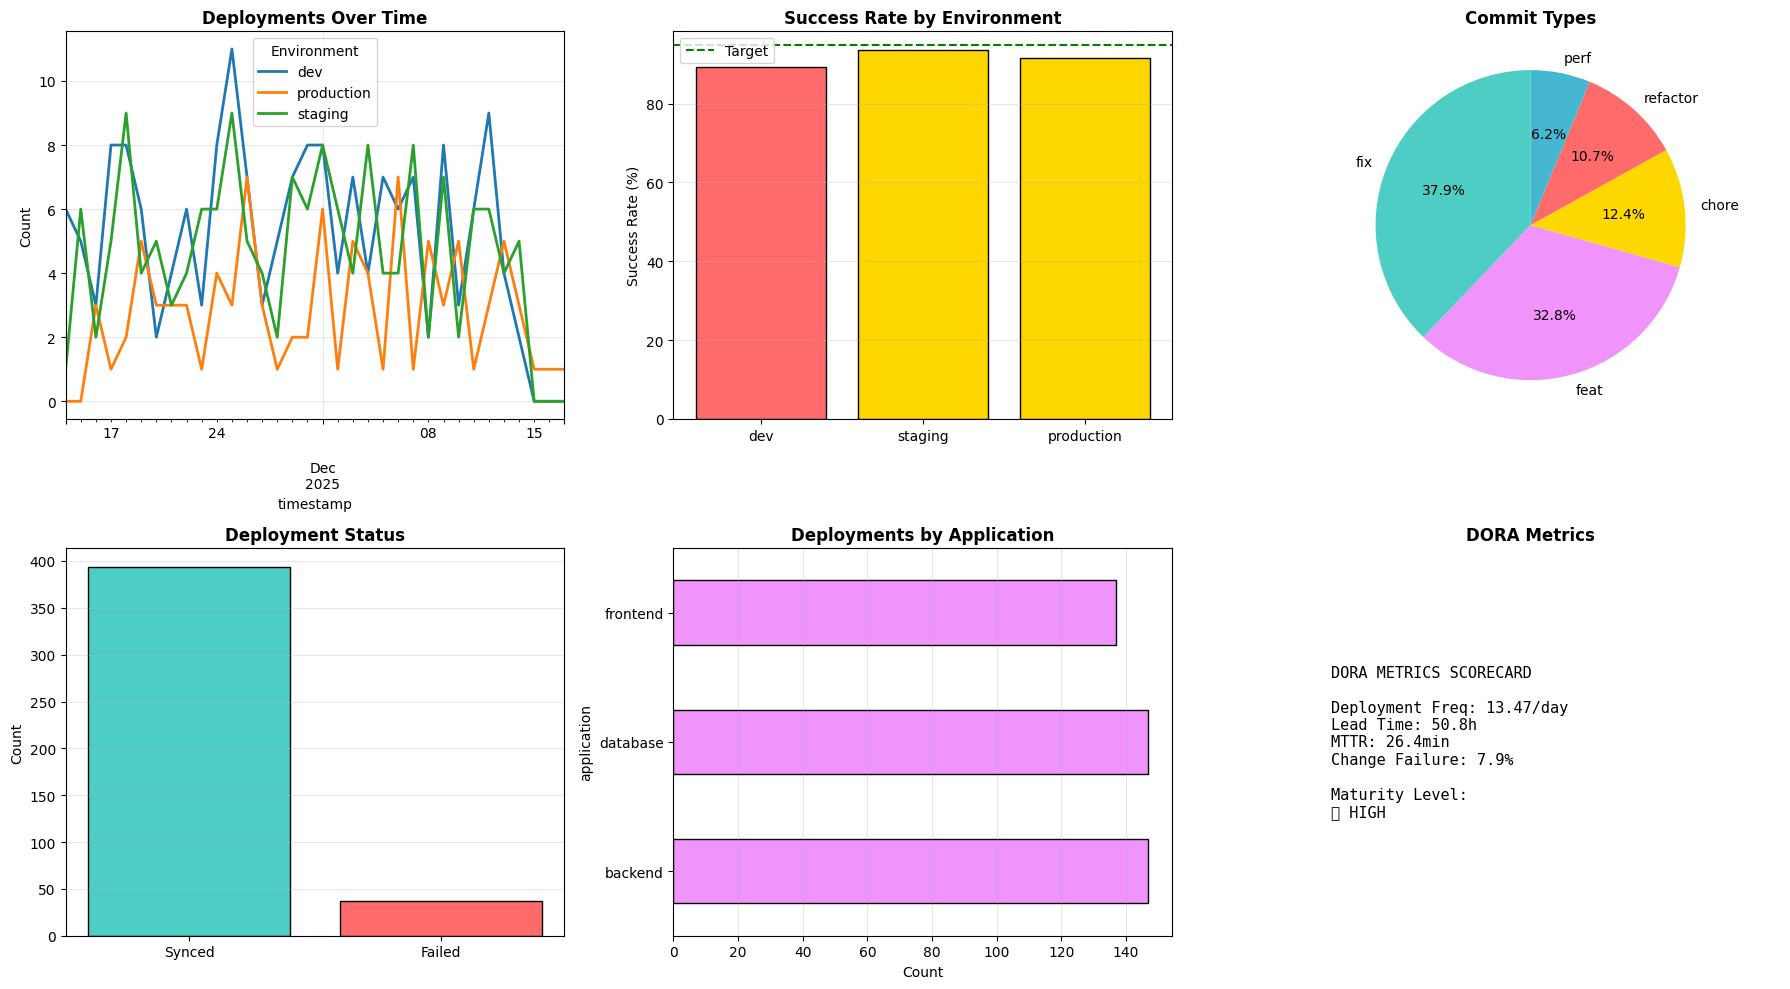


✅ GitOps automation complete!

📊 SUMMARY:
  Commits: 177
  Deployments: 431
  Rollbacks: 34
  Deployment Freq: 13.47/day


In [11]:
"""
DevOps Project 6: GitOps Workflow Automation with ArgoCD Integration
Manages Kubernetes deployments through Git, implements automated rollback strategies,
and provides multi-environment promotion workflows with DORA metrics tracking.
"""

import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
import warnings
warnings.filterwarnings('ignore')

class GitOpsAutomation:
    def __init__(self):
        self.git_commits = None
        self.deployments = None
        self.environments = ['dev', 'staging', 'production']
        self.applications = ['frontend', 'backend', 'database']
        self.rollbacks = []
        self.metrics = {}

    def simulate_git_activity(self, days=30):
        """Simulate Git commit history"""
        print("\n📝 Generating Git commit history...")

        commits = []
        current_time = datetime.now() - timedelta(days=days)

        commit_types = ['feat', 'fix', 'chore', 'refactor', 'perf']
        authors = ['alice', 'bob', 'charlie', 'diana']

        for day in range(days):
            num_commits = np.random.randint(3, 10)

            for _ in range(num_commits):
                commit_time = current_time + timedelta(
                    hours=np.random.randint(9, 18),
                    minutes=np.random.randint(0, 60)
                )

                app = np.random.choice(self.applications)
                ctype = np.random.choice(commit_types, p=[0.4, 0.3, 0.15, 0.1, 0.05])
                author = np.random.choice(authors)

                commits.append({
                    'sha': hashlib.sha1(f"{commit_time}{app}".encode()).hexdigest()[:8],
                    'timestamp': commit_time,
                    'author': author,
                    'type': ctype,
                    'application': app,
                    'message': f'{ctype}: update {app}',
                    'files_changed': np.random.randint(1, 6)
                })

            current_time += timedelta(days=1)

        self.git_commits = pd.DataFrame(commits)
        print(f"  ✓ Generated {len(commits)} commits")
        return self.git_commits

    def simulate_deployments(self):
        """Simulate ArgoCD deployments"""
        print("\n🚀 Simulating deployments...")

        deployments = []

        for _, commit in self.git_commits.iterrows():
            app = commit['application']

            # Deploy to dev immediately
            deployments.append({
                'timestamp': commit['timestamp'],
                'application': app,
                'environment': 'dev',
                'commit_sha': commit['sha'],
                'status': np.random.choice(['Synced', 'Failed'], p=[0.9, 0.1]),
                'duration_sec': np.random.uniform(10, 60)
            })

            # Deploy to staging after delay (if dev succeeded)
            if deployments[-1]['status'] == 'Synced':
                staging_time = commit['timestamp'] + timedelta(hours=np.random.uniform(2, 6))
                deployments.append({
                    'timestamp': staging_time,
                    'application': app,
                    'environment': 'staging',
                    'commit_sha': commit['sha'],
                    'status': np.random.choice(['Synced', 'Failed'], p=[0.93, 0.07]),
                    'duration_sec': np.random.uniform(15, 90)
                })

                # Deploy to production (if staging succeeded)
                if deployments[-1]['status'] == 'Synced' and np.random.random() < 0.6:
                    prod_time = staging_time + timedelta(days=np.random.uniform(1, 3))
                    deployments.append({
                        'timestamp': prod_time,
                        'application': app,
                        'environment': 'production',
                        'commit_sha': commit['sha'],
                        'status': np.random.choice(['Synced', 'Failed'], p=[0.95, 0.05]),
                        'duration_sec': np.random.uniform(30, 120)
                    })

        self.deployments = pd.DataFrame(deployments)
        print(f"  ✓ Simulated {len(deployments)} deployments")

        for env in self.environments:
            env_deploys = self.deployments[self.deployments['environment'] == env]
            success_rate = (env_deploys['status'] == 'Synced').sum() / len(env_deploys) * 100
            print(f"    • {env}: {len(env_deploys)} deployments, {success_rate:.1f}% success")

        return self.deployments

    def simulate_rollbacks(self):
        """Simulate automated rollbacks for failed deployments"""
        print("\n🔄 Simulating automated rollbacks...")

        failed = self.deployments[self.deployments['status'] == 'Failed']

        for _, fail in failed.iterrows():
            previous = self.deployments[
                (self.deployments['application'] == fail['application']) &
                (self.deployments['environment'] == fail['environment']) &
                (self.deployments['timestamp'] < fail['timestamp']) &
                (self.deployments['status'] == 'Synced')
            ]

            if len(previous) > 0:
                self.rollbacks.append({
                    'timestamp': fail['timestamp'] + timedelta(minutes=np.random.uniform(5, 15)),
                    'application': fail['application'],
                    'environment': fail['environment'],
                    'from_commit': fail['commit_sha'],
                    'to_commit': previous.iloc[-1]['commit_sha'],
                    'success': np.random.choice([True, False], p=[0.95, 0.05])
                })

        print(f"  ✓ Executed {len(self.rollbacks)} rollbacks")
        if self.rollbacks:
            successful = sum(1 for r in self.rollbacks if r['success'])
            print(f"    • Success rate: {successful}/{len(self.rollbacks)}")

        return self.rollbacks

    def calculate_dora_metrics(self):
        """Calculate DORA metrics"""
        print("\n📊 Calculating DORA metrics...")

        # Deployment frequency
        total_days = (self.deployments['timestamp'].max() -
                     self.deployments['timestamp'].min()).days
        deploy_freq = len(self.deployments) / max(total_days, 1)

        # Lead time (commit to production)
        lead_times = []
        prod_deploys = self.deployments[
            (self.deployments['environment'] == 'production') &
            (self.deployments['status'] == 'Synced')
        ]

        for _, deploy in prod_deploys.iterrows():
            commit = self.git_commits[self.git_commits['sha'] == deploy['commit_sha']]
            if len(commit) > 0:
                lead_time_hours = (deploy['timestamp'] - commit.iloc[0]['timestamp']).total_seconds() / 3600
                lead_times.append(lead_time_hours)

        # Success rates
        success_rates = {}
        for env in self.environments:
            env_deploys = self.deployments[self.deployments['environment'] == env]
            success_rates[env] = (env_deploys['status'] == 'Synced').sum() / len(env_deploys) * 100

        # MTTR
        mttr_values = [r['timestamp'].minute for r in self.rollbacks if r['success']] if self.rollbacks else [0]

        self.metrics = {
            'deployment_frequency': round(deploy_freq, 2),
            'mean_lead_time': round(np.mean(lead_times) if lead_times else 0, 2),
            'median_lead_time': round(np.median(lead_times) if lead_times else 0, 2),
            'success_rates': success_rates,
            'total_deployments': len(self.deployments),
            'total_rollbacks': len(self.rollbacks),
            'mttr_minutes': round(np.mean(mttr_values), 2),
            'change_failure_rate': round(len(self.rollbacks) / len(self.deployments) * 100, 2)
        }

        print(f"  ✓ Deployment Frequency: {self.metrics['deployment_frequency']:.2f}/day")
        print(f"  ✓ Mean Lead Time: {self.metrics['mean_lead_time']:.2f} hours")
        print(f"  ✓ Change Failure Rate: {self.metrics['change_failure_rate']:.2f}%")
        print(f"  ✓ MTTR: {self.metrics['mttr_minutes']:.2f} minutes")

        return self.metrics

    def generate_report(self):
        """Generate comprehensive report"""
        print("\n" + "="*80)
        print("🔄 GITOPS WORKFLOW AUTOMATION REPORT")
        print("="*80)

        print("\n📝 GIT ACTIVITY")
        print("-" * 80)
        print(f"Total Commits:                  {len(self.git_commits)}")
        print(f"Contributors:                   {self.git_commits['author'].nunique()}")
        print(f"Applications:                   {len(self.applications)}")

        print("\n🚀 DEPLOYMENT METRICS (DORA)")
        print("-" * 80)
        print(f"Deployment Frequency:           {self.metrics['deployment_frequency']:.2f}/day")
        print(f"Total Deployments:              {self.metrics['total_deployments']}")
        print(f"Mean Lead Time:                 {self.metrics['mean_lead_time']:.2f} hours")
        print(f"Change Failure Rate:            {self.metrics['change_failure_rate']:.2f}%")
        print(f"MTTR:                           {self.metrics['mttr_minutes']:.2f} minutes")

        print("\n✅ SUCCESS RATES BY ENVIRONMENT")
        print("-" * 80)
        for env, rate in self.metrics['success_rates'].items():
            status = '🟢' if rate >= 95 else ('🟡' if rate >= 90 else '🔴')
            print(f"{status} {env:15} {rate:6.2f}%")

        print("\n🔄 ROLLBACK SUMMARY")
        print("-" * 80)
        print(f"Total Rollbacks:                {self.metrics['total_rollbacks']}")

        print("\n🏆 DORA MATURITY ASSESSMENT")
        print("-" * 80)

        elite = {
            'freq': self.metrics['deployment_frequency'] > 1,
            'lead': self.metrics['mean_lead_time'] < 24,
            'mttr': self.metrics['mttr_minutes'] < 60,
            'fail': self.metrics['change_failure_rate'] < 15
        }

        score = sum(elite.values())

        print(f"Deployment Frequency: {'✅' if elite['freq'] else '❌'} {'Elite' if elite['freq'] else 'Improve'}")
        print(f"Lead Time:            {'✅' if elite['lead'] else '❌'} {'Elite' if elite['lead'] else 'Improve'}")
        print(f"MTTR:                 {'✅' if elite['mttr'] else '❌'} {'Elite' if elite['mttr'] else 'Improve'}")
        print(f"Change Failure Rate:  {'✅' if elite['fail'] else '❌'} {'Elite' if elite['fail'] else 'Improve'}")

        if score == 4:
            print(f"\nMaturity: 🏆 ELITE PERFORMER")
        elif score == 3:
            print(f"\nMaturity: 🥈 HIGH PERFORMER")
        elif score == 2:
            print(f"\nMaturity: 🥉 MEDIUM PERFORMER")
        else:
            print(f"\nMaturity: 📈 NEEDS IMPROVEMENT")

        print(f"\n{'='*80}\n")

    def visualize_metrics(self):
        """Create visualizations"""
        fig = plt.figure(figsize=(18, 10))

        # 1. Deployments over time
        ax1 = plt.subplot(2, 3, 1)
        timeline = self.deployments.groupby([
            pd.Grouper(key='timestamp', freq='D'),
            'environment'
        ]).size().unstack(fill_value=0)
        timeline.plot(ax=ax1, linewidth=2)
        ax1.set_title('Deployments Over Time', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Count')
        ax1.legend(title='Environment')
        ax1.grid(True, alpha=0.3)

        # 2. Success rates
        ax2 = plt.subplot(2, 3, 2)
        rates = pd.Series(self.metrics['success_rates'])
        colors = ['#4ECDC4' if r >= 95 else '#FFD700' if r >= 90 else '#FF6B6B' for r in rates]
        ax2.bar(rates.index, rates.values, color=colors, edgecolor='black')
        ax2.set_title('Success Rate by Environment', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Success Rate (%)')
        ax2.axhline(y=95, color='green', linestyle='--', label='Target')
        ax2.legend()
        ax2.grid(True, alpha=0.3, axis='y')

        # 3. Commit types
        ax3 = plt.subplot(2, 3, 3)
        commit_types = self.git_commits['type'].value_counts()
        ax3.pie(commit_types.values, labels=commit_types.index, autopct='%1.1f%%',
               startangle=90, colors=['#4ECDC4', '#f093fb', '#FFD700', '#FF6B6B', '#45B7D1'])
        ax3.set_title('Commit Types', fontsize=12, fontweight='bold')

        # 4. Deployment status
        ax4 = plt.subplot(2, 3, 4)
        status = self.deployments['status'].value_counts()
        ax4.bar(status.index, status.values,
               color=['#4ECDC4' if s == 'Synced' else '#FF6B6B' for s in status.index],
               edgecolor='black')
        ax4.set_title('Deployment Status', fontsize=12, fontweight='bold')
        ax4.set_ylabel('Count')
        ax4.grid(True, alpha=0.3, axis='y')

        # 5. Deployments by app
        ax5 = plt.subplot(2, 3, 5)
        app_deploys = self.deployments.groupby('application').size()
        app_deploys.plot(kind='barh', ax=ax5, color='#f093fb', edgecolor='black')
        ax5.set_title('Deployments by Application', fontsize=12, fontweight='bold')
        ax5.set_xlabel('Count')
        ax5.grid(True, alpha=0.3, axis='x')

        # 6. DORA scorecard
        ax6 = plt.subplot(2, 3, 6)
        ax6.axis('off')
        dora_text = f"""
DORA METRICS SCORECARD

Deployment Freq: {self.metrics['deployment_frequency']:.2f}/day
Lead Time: {self.metrics['mean_lead_time']:.1f}h
MTTR: {self.metrics['mttr_minutes']:.1f}min
Change Failure: {self.metrics['change_failure_rate']:.1f}%

Maturity Level:
{'🏆 ELITE' if sum([
    self.metrics['deployment_frequency'] > 1,
    self.metrics['mean_lead_time'] < 24,
    self.metrics['mttr_minutes'] < 60,
    self.metrics['change_failure_rate'] < 15
]) == 4 else '🥈 HIGH' if sum([
    self.metrics['deployment_frequency'] > 1,
    self.metrics['mean_lead_time'] < 24,
    self.metrics['mttr_minutes'] < 60,
    self.metrics['change_failure_rate'] < 15
]) == 3 else '📈 IMPROVE'}
        """
        ax6.text(0.1, 0.5, dora_text, fontsize=11, family='monospace',
                verticalalignment='center')
        ax6.set_title('DORA Metrics', fontsize=12, fontweight='bold')

        plt.tight_layout()
        plt.savefig('gitops_dashboard.png', dpi=300, bbox_inches='tight')
        print("\n✓ Visualization saved as 'gitops_dashboard.png'")
        plt.show()

def main():
    print("🔄 GitOps Workflow Automation with ArgoCD")
    print("=" * 80)

    gitops = GitOpsAutomation()

    # Generate data
    gitops.simulate_git_activity(days=30)
    gitops.simulate_deployments()
    gitops.simulate_rollbacks()

    # Calculate metrics
    gitops.calculate_dora_metrics()

    # Generate report
    gitops.generate_report()

    # Visualize
    print("\n📊 Creating visualizations...")
    gitops.visualize_metrics()

    print("\n✅ GitOps automation complete!")
    print(f"\n📊 SUMMARY:")
    print(f"  Commits: {len(gitops.git_commits)}")
    print(f"  Deployments: {len(gitops.deployments)}")
    print(f"  Rollbacks: {len(gitops.rollbacks)}")
    print(f"  Deployment Freq: {gitops.metrics['deployment_frequency']:.2f}/day")

if __name__ == "__main__":
    main()